In [50]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.datasets import load_iris
from datetime import datetime, timedelta


from scipy import stats

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [51]:
#Loading the data
df = pd.read_csv("data-2.csv")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [53]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [54]:
#Checking for missing values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.query('UnitPrice < 0')

In [ ]:
df.query('Quantity < 0')

if there are dublicates, exolore them to know what is in there before deciding what to do with it.

In [55]:
#Converting InvoiceDate to DateTime Object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Converting the Customer ID to categorical data type
df['CustomerID'] = df['CustomerID'].astype('category')

In [56]:
#Checking for duplicates
duplicates =df.duplicated()
number_of_duplicates = df.duplicated().sum()
duplicate_rows = df[duplicates]

number_of_duplicates, duplicate_rows

(5268,
        InvoiceNo StockCode                        Description  Quantity  \
 517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
 527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
 537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
 539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
 555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
 ...          ...       ...                                ...       ...   
 541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
 541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
 541692    581538     22992             REVOLVER WOODEN RULER          1   
 541699    581538     22694                       WICKER STAR          1   
 541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   
 
                InvoiceDate  UnitPrice CustomerID         Country  
 517    201

In [57]:
# Identifying rows with any empty(NaN) values
rows_with_nan = df.isnull().any(axis=1)

# Counting the number of rows with any empty(NaN) values
num_rows_with_nan = rows_with_nan.sum()

# Displaying the count and a sample of such rows
num_rows_with_nan, df[rows_with_nan].head() if num_rows_with_nan > 0 else "No rows with missing values"

(135080,
      InvoiceNo StockCode                      Description  Quantity  \
 622     536414     22139                              NaN        56   
 1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
 1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
 1445    536544     21786               POLKADOT RAIN HAT          4   
 1446    536544     21787            RAIN PONCHO RETROSPOT         2   
 
              InvoiceDate  UnitPrice CustomerID         Country  
 622  2010-12-01 11:52:00       0.00        NaN  United Kingdom  
 1443 2010-12-01 14:32:00       2.51        NaN  United Kingdom  
 1444 2010-12-01 14:32:00       2.51        NaN  United Kingdom  
 1445 2010-12-01 14:32:00       0.85        NaN  United Kingdom  
 1446 2010-12-01 14:32:00       1.66        NaN  United Kingdom  )

In [58]:
#Removing all rows with any missing values
df = df.dropna()

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [59]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
#Creating a Revenue Column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df

C:\Users\Kwaku Bonsu-Afrane\AppData\Local\Temp\ipykernel_15384\644772174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


C:\Users\Kwaku Bonsu-Afrane\AppData\Local\Temp\ipykernel_15384\3633249889.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CM = df.corr()


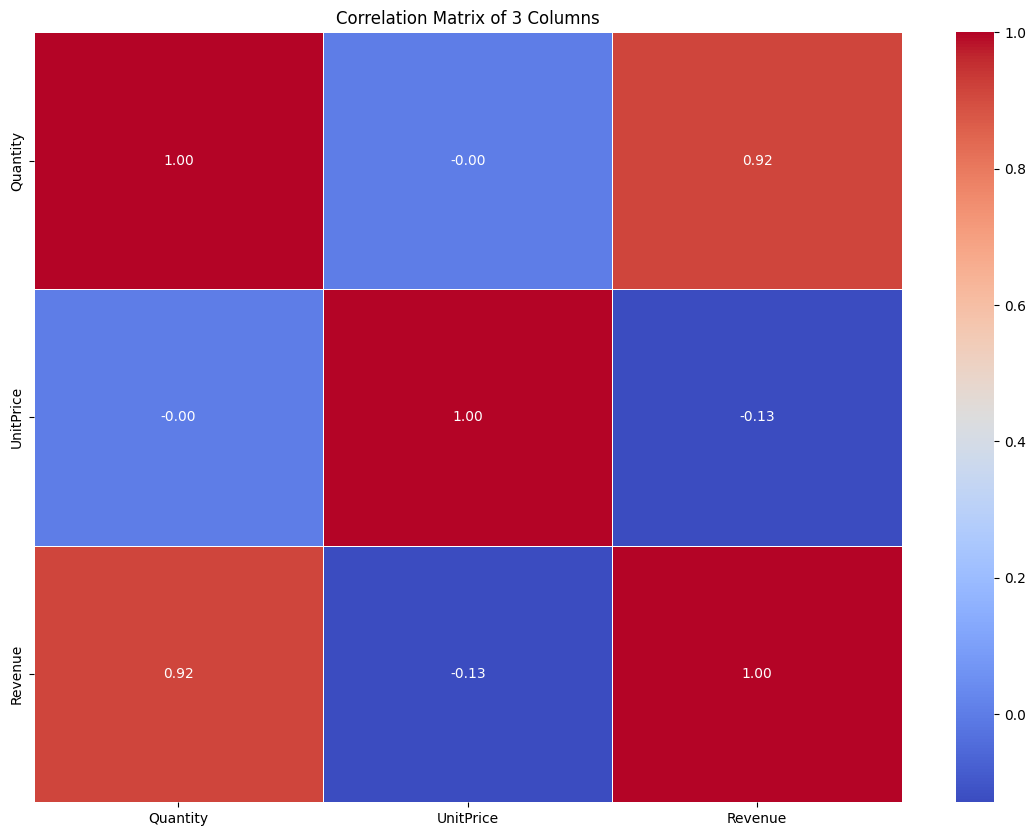

In [61]:
#Correlation Matrix between factors
CM = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(CM, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of 3 Columns')
plt.show()

<AxesSubplot: >

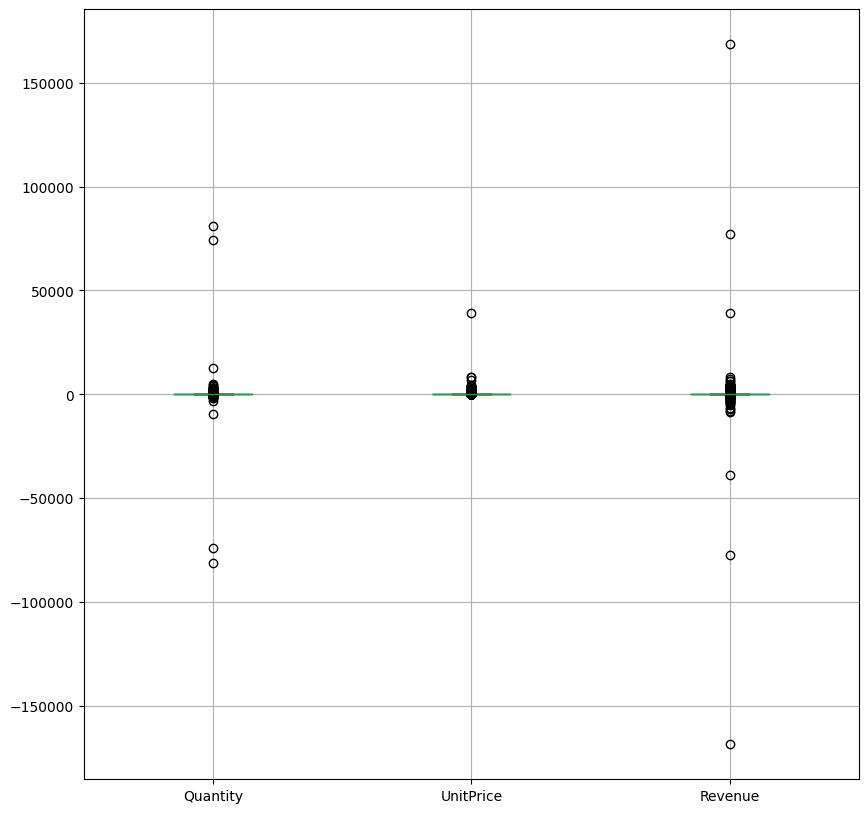

In [62]:
df.boxplot(figsize=(10,10))

Top Customers(Customers who provide the most revenue)

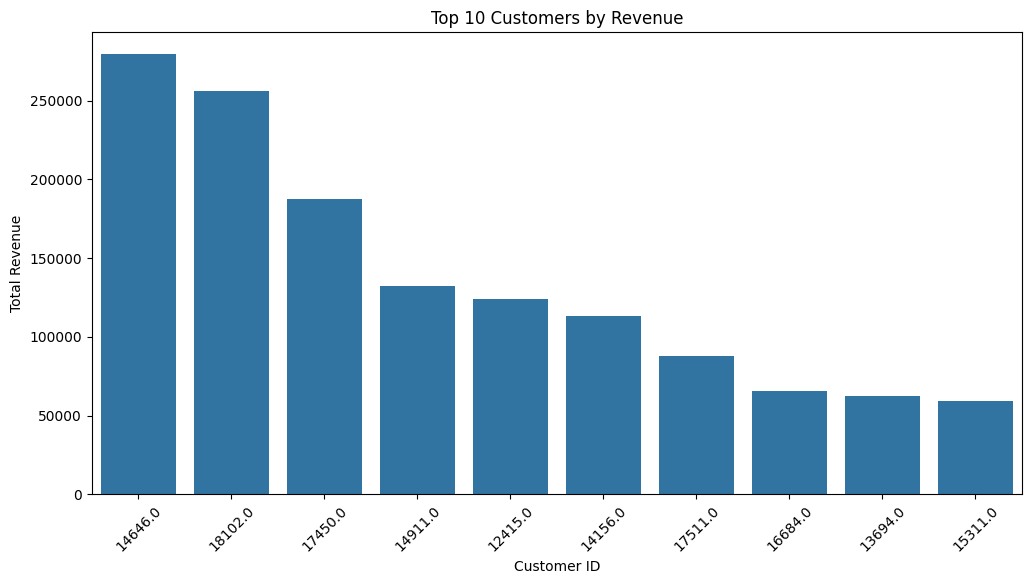

In [63]:
total_revenue_per_customer = df.groupby('CustomerID')['Revenue'].sum()
total_revenue_per_customer = total_revenue_per_customer.sort_values(ascending=False)
top_customers = total_revenue_per_customer.head(10)  # Top 10 customers

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



Customers who make the most Purchases

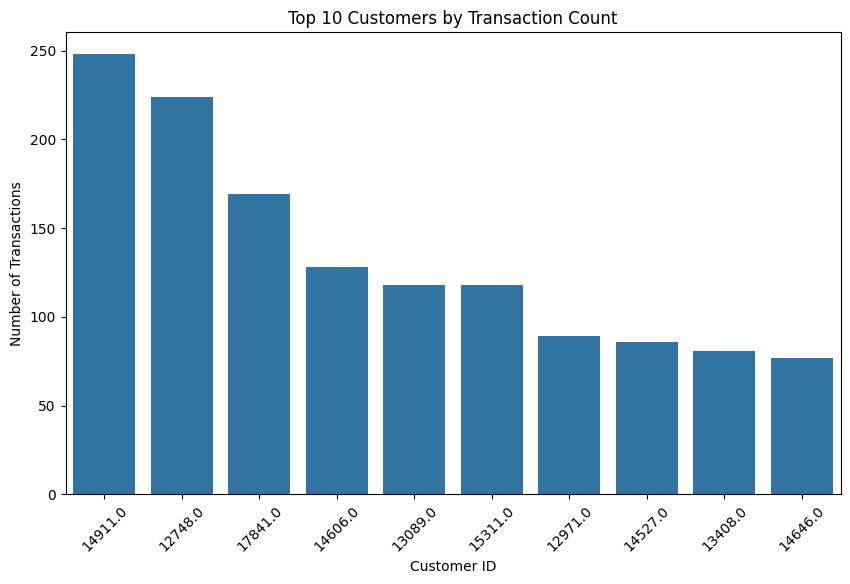

In [64]:
transaction_count_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
transaction_count_per_customer = transaction_count_per_customer.sort_values(ascending=False)
top_customers_by_transactions = transaction_count_per_customer.head(10)  # Top 10 customers

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_by_transactions.index.astype(str), y=top_customers_by_transactions.values)
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


Product that give the most revenue

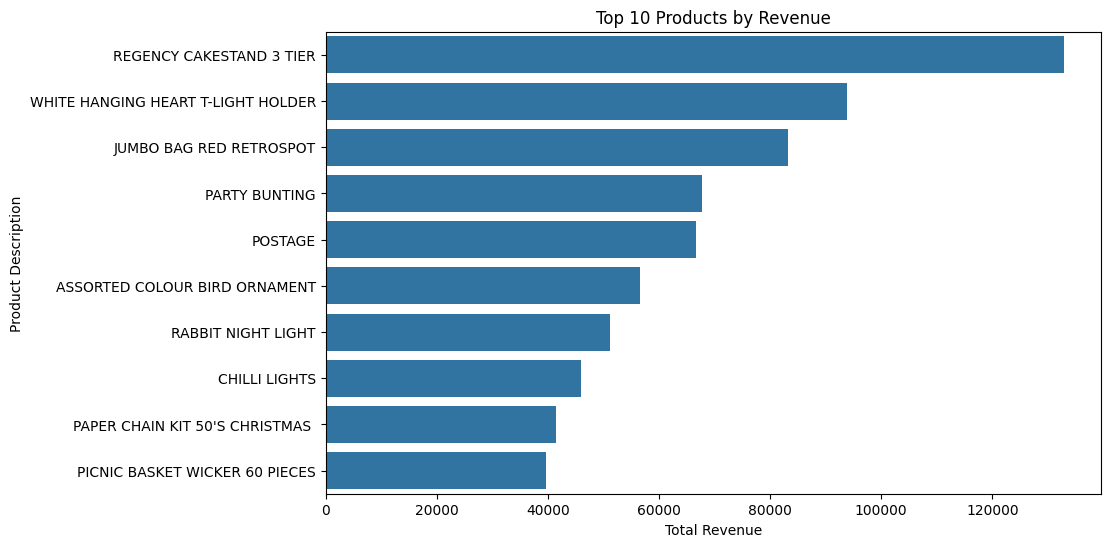

In [65]:
total_revenue_per_product = df.groupby('Description')['Revenue'].sum()
total_revenue_per_product = total_revenue_per_product.sort_values(ascending=False)
top_products_by_revenue = total_revenue_per_product.head(10)  # Top 10 products

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_by_revenue.values, y=top_products_by_revenue.index)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


Countries with the higest Revenue(Highest Total Sales)

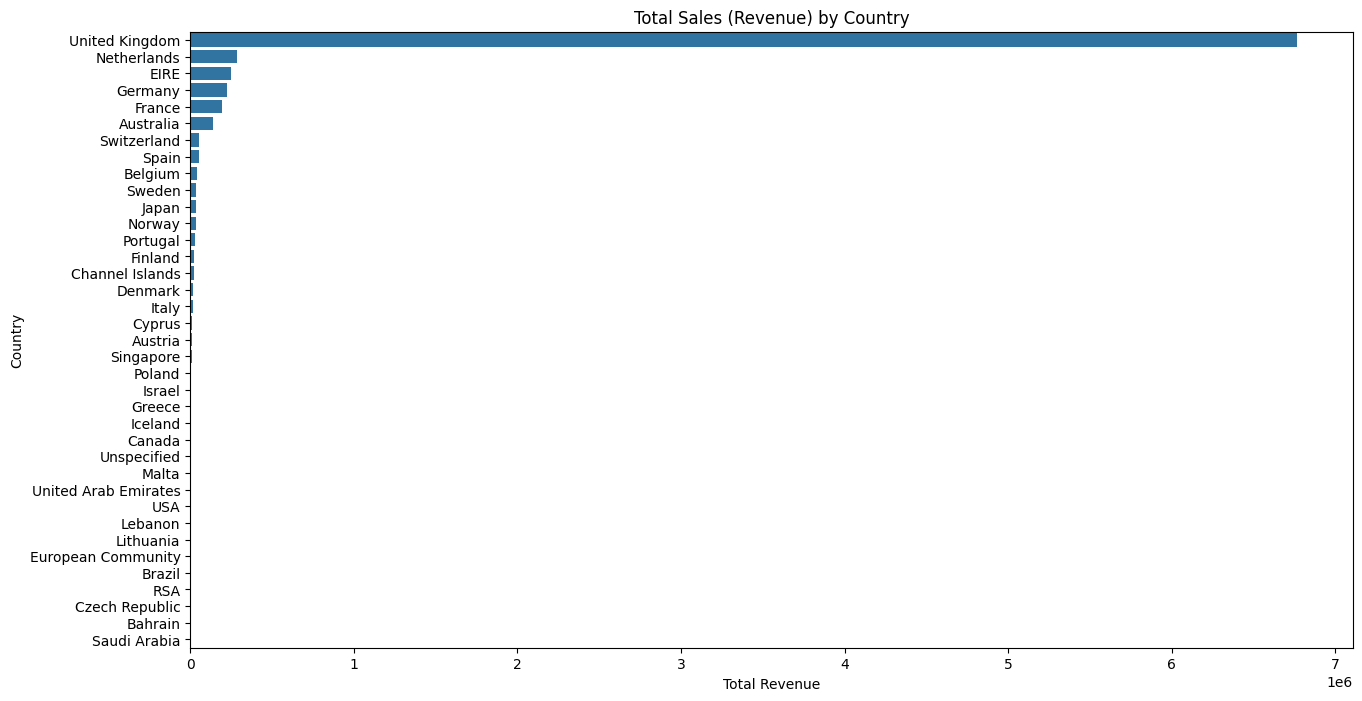

In [67]:
total_revenue_by_country = df.groupby('Country')['Revenue'].sum()
total_revenue_by_country = total_revenue_by_country.sort_values(ascending=False)
top_countries_by_revenue = total_revenue_by_country.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=total_revenue_by_country.values, y=total_revenue_by_country.index)
plt.title('Total Sales (Revenue) by Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()


Average Unit Price and Quantity sold per country

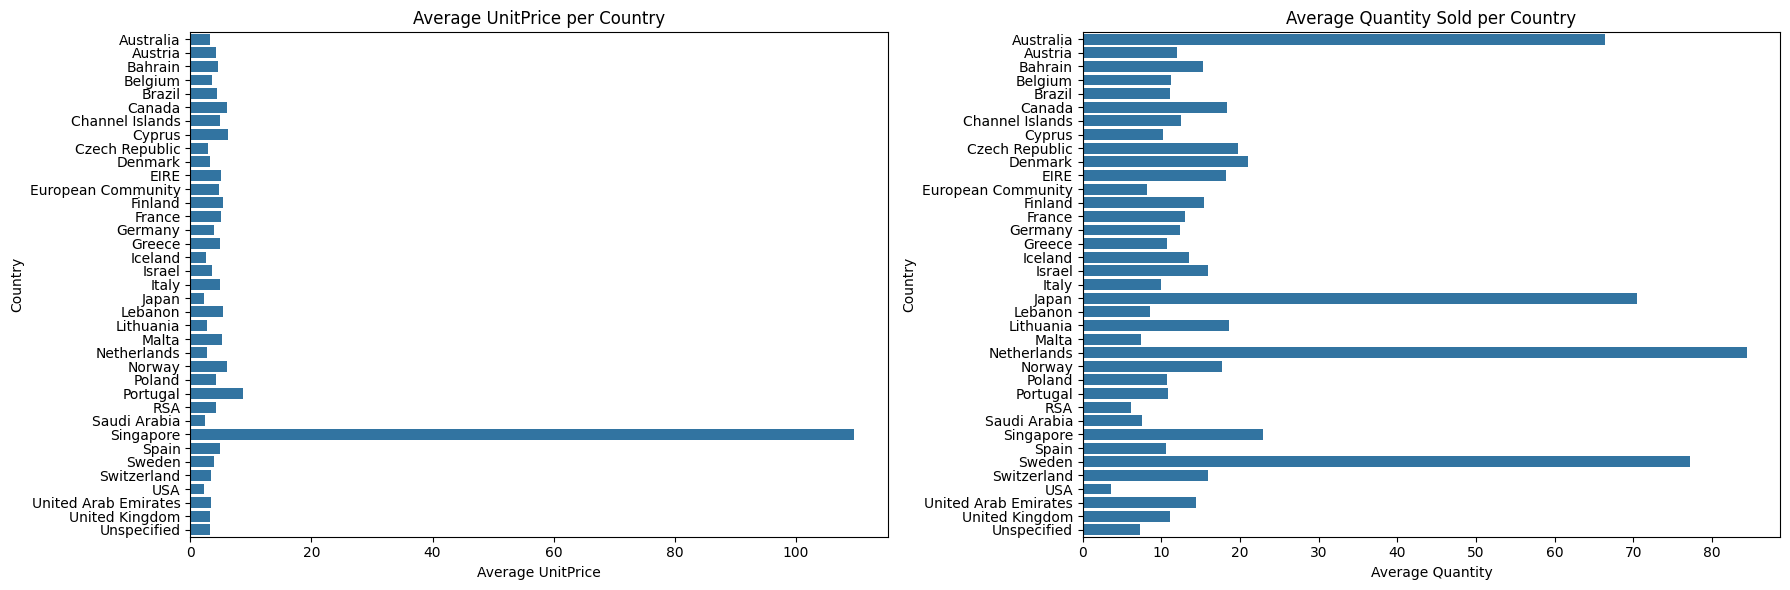

In [69]:
average_metrics_per_country = df.groupby('Country').agg({'UnitPrice': 'mean', 'Quantity': 'mean'})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

 #average revenue
# Average UnitPrice per Country
sns.barplot(x=average_metrics_per_country['UnitPrice'], y=average_metrics_per_country.index, ax=axes[0])
axes[0].set_title('Average UnitPrice per Country')
axes[0].set_xlabel('Average UnitPrice')
axes[0].set_ylabel('Country')

# Average Quantity per Country
sns.barplot(x=average_metrics_per_country['Quantity'], y=average_metrics_per_country.index, ax=axes[1])
axes[1].set_title('Average Quantity Sold per Country')
axes[1].set_xlabel('Average Quantity')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()


Average Quantity Sold per Day, Month and Year

In [45]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year


C:\Users\Kwaku Bonsu-Afrane\AppData\Local\Temp\ipykernel_15384\815788351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
C:\Users\Kwaku Bonsu-Afrane\AppData\Local\Temp\ipykernel_15384\815788351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
C:\Users\Kwaku Bonsu-Afrane\AppData\Local\Temp\ipykernel_15384\815788351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [46]:
average_quantity_per_day = df.groupby('DayOfWeek')['Quantity'].mean()
average_quantity_per_month = df.groupby('Month')['Quantity'].mean()
average_quantity_per_year = df.groupby('Year')['Quantity'].mean()


C:\Users\Kwaku Bonsu-Afrane\AppData\Local\Temp\ipykernel_15384\3798402124.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(day_labels)


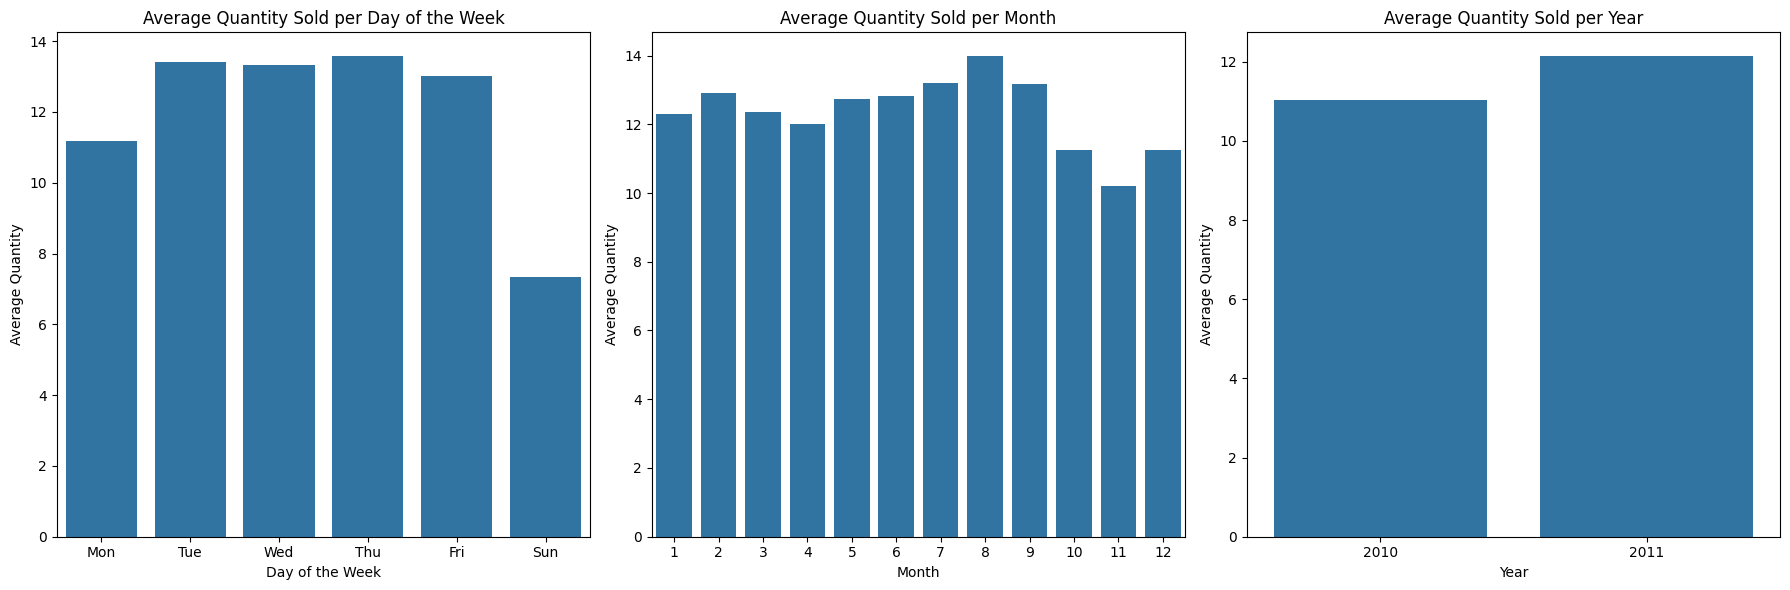

In [47]:
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Average Quantity per Day of the Week
sns.barplot(x=average_quantity_per_day.index, y=average_quantity_per_day.values, ax=axes[0])
axes[0].set_title('Average Quantity Sold per Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Quantity')
axes[0].set_xticklabels(day_labels)

# Average Quantity per Month
sns.barplot(x=average_quantity_per_month.index, y=average_quantity_per_month.values, ax=axes[1])
axes[1].set_title('Average Quantity Sold per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Quantity')

# Average Quantity per Year
sns.barplot(x=average_quantity_per_year.index, y=average_quantity_per_year.values, ax=axes[2])
axes[2].set_title('Average Quantity Sold per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Quantity')

plt.tight_layout()
plt.show()

Performing Independent-Sample t-test on Hypothesis 1 : Customers from the UK Generate significantly more revenue than customers from other countries.

H0: There is no significant difference in average revenue between customers from the UK and other countries

H1: There is a significant difference in average revenue between customers from the UK and other countries.

In [48]:
uk_revenues = df[df['Country'] == 'United Kingdom']['Revenue']
other_countries_revenues = df[df['Country'] != 'United Kingdom']['Revenue']

t_stat, p_value = ttest_ind(uk_revenues, other_countries_revenues, equal_var=False, nan_policy='omit')

alpha = 0.05
print("t-statistic:", t_stat)
print("p-value:", p_value)
# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject H0: There is significant difference in average revenue between customers from the UK and other countries.")
else:
    print("Fail to Reject H1: There is no significant difference in average revenue between customers from the UK and other countries.")


t-statistic: -17.25068697895594
p-value: 1.1892339388469667e-66
Reject H0: There is significant difference in average revenue between customers from the UK and other countries.


Hypothesis 2:  Higher-priced items (above the median price) are less frequently sold than lower-priced items

H0: There a significant difference in sales frequency for hiher priced items than lower priced items.

H1: There a no significant difference in sales frequency for hiher priced items than lower priced items.


Chi Square Test to check relationship between two categorical variables (sales frequency in terms of items priced above and below the median)



In [49]:
median_unit_price = df['UnitPrice'].median()

#creating a new column in df
df['PriceCategory'] = df['UnitPrice'].apply(lambda x: 'Above Median' if x > median_unit_price else 'Below Median')

transaction_counts = df['PriceCategory'].value_counts()

contingency_table = pd.crosstab(df['PriceCategory'], df['InvoiceNo'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject H0: There is a significant difference in sales frequency for hiher priced items than lower priced items.")
else:
    print("Fail to Reject H1: There is no significant difference in sales frequency for hiher priced items than lower priced items.")





C:\Users\Kwaku Bonsu-Afrane\AppData\Local\Temp\ipykernel_15384\2015529978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceCategory'] = df['UnitPrice'].apply(lambda x: 'Above Median' if x > median_unit_price else 'Below Median')


Contingency Table:
InvoiceNo      536365  536366  536367  536368  536369  536370  536371  536372  \
PriceCategory                                                                   
Above Median        7       0      10       4       1       8       1       0   
Below Median        0       2       2       0       0      12       0       2   

InvoiceNo      536373  536374  ...  C581464  C581465  C581466  C581468  \
PriceCategory                  ...                                       
Above Median       12       1  ...        2        2        4        1   
Below Median        4       0  ...        0        2        1        1   

InvoiceNo      C581470  C581484  C581490  C581499  C581568  C581569  
PriceCategory                                                        
Above Median         1        1        0        1        1        0  
Below Median         0        0        2        0        0        2  

[2 rows x 22190 columns]
Chi-Square Statistic: 68152.00033557351
P-Value: 0.0
